### Python SKU Barcode generator

In [1]:
# Import libaries
from PIL import Image
import pandas as pd
import requests
import io
from PIL import Image, ImageOps, ImageDraw
from PIL import ImageFont
from barcode import EAN13
import barcode
from barcode.writer import ImageWriter


In [2]:
# Url of the dataframe
url = "https://gist.githubusercontent.com/samirsaci/89d814ea35b0f6f6309701389cbb6ce2/raw/eec1d163e9c609646d0c114ac795b3cb04523133/label_information.csv"

In [3]:
# Read csv from url
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c

,SKU,SKU Code,Arrow,Zone,Cell,Loc,Location,log,arrow,cat,special
0,1,6549541941942,8,67,49,1,067-49-1,Pieces,Arrow Red,Dress,GOH
1,2,6388908160619,1,64,13,2,064-13-2,Carton,Arrow Red Rev,Tie,RFID
2,3,6035901125615,5,62,12,9,062-12-9,Carton,Arrow Red Rev,Shoes Lady,Label
3,4,6380994358294,3,58,79,5,058-79-5,Carton,Arrow Green Rev,Jewelry,Danger
4,5,7056603542859,2,55,76,8,055-76-8,Pieces,Arrow Green,Jewelry,Sprinkler


In [5]:
# Start the loop
for index, row in c.iterrows():

    # Create White Canvas with border
    bg = Image.new('RGBA', (500, 200), color = (255, 255, 255))
    bg = ImageOps.expand(bg,border=1,fill='black')
    
    # Create a function to generate and save a barcode image
    def create_ean(number):
        my_code = EAN13(number, writer=ImageWriter())
        my_code.save("Img/" + row['Location'])

    # Import the bar code
    create_ean(str(row['SKU Code']))
    bcode = Image.open('Img/'+ row['Location'] +'.png').convert("RGBA")
    bcode = bcode.resize((int(bcode.size[0]*0.5),int(bcode.size[1]*0.5)))
    # Add barcode
    bg.paste(bcode, (100, 5), bcode)
    
    # Add location number
    img_draw = ImageDraw.Draw(bg)
    font = ImageFont.truetype('Arial', 60)
    img_draw.text((140, 135),'{}'.format(row['Location']),(0,0,0),font=font, stroke_width=1,stroke_fill="black")
    create_ean(str(row['SKU Code']))
    
    # Save the barcode with Location code
    bg.save("Img/" + str(row['Location']) + ".png")
    

In [25]:
# Adding Icons in the pictures...

# arr = Image.open('Img/arrow/{}.png'.format(row['arrow'])).convert("RGBA")
# arr = arr.resize((int(arr.size[0]*1.35),int(arr.size[1]*1.35)))
# # Paste with Coordinates
# bg.paste(arr, (-40, 0), arr)
    
# # Icon 1
# zone = Image.open('Img/log/{}.png'.format(row['log'])).convert("RGBA")
# perc_size = 0.45
# l1, l2 = int(zone.size[0]*perc_size), int(zone.size[1]*perc_size)
# zone = zone.resize((l1,l2))
# # Paste with coordinates
# x1, y1 = 415, 0
# bg.paste(zone, (x1, y1), zone)

# # Icon 2
# zone = Image.open('Img/cat/{}.png'.format(row['cat'])).convert("RGBA")
# zone = zone.resize((l1,l2))
# # Paste with coordinates
# x1, y1 = 415, y1 + l2
# bg.paste(zone, (x1, y1), zone)

# # Icon 3
# zone = Image.open('Img/special/{}.png'.format(row['special'])).convert("RGBA")
# zone = zone.resize((l1,l2))
# # Paste with coordinates
# x1, y1 = 415, y1 + l2
# bg.paste(zone, (x1, y1), zone)

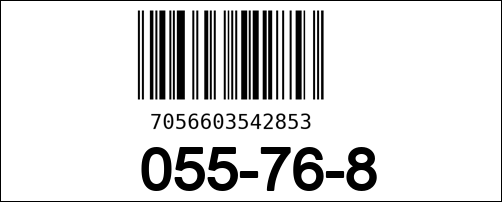

In [45]:
bg
